# How to split Dataset

In [3]:
# Data set
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_target  = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### make dataset

In [7]:
# input data = { fish_length, weight }
import numpy as np

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
# [25.4, 242.0], [26.3, 290.0], ...]

print(fish_data)
print(len(fish_data))

input_arr = np.array(fish_data) # R (49 X 2)
target_arr = np.array(fish_target) # R (49 X 1)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
49


#### analysis of dataset

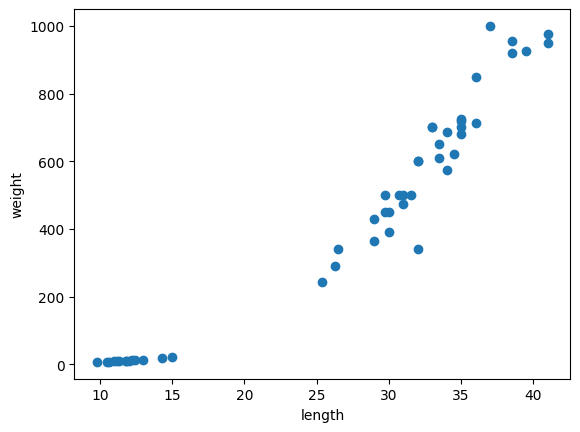

In [8]:
import matplotlib.pyplot as plt

plt.scatter(input_arr[:, 0], input_arr[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#### spilit dataset (try #1)

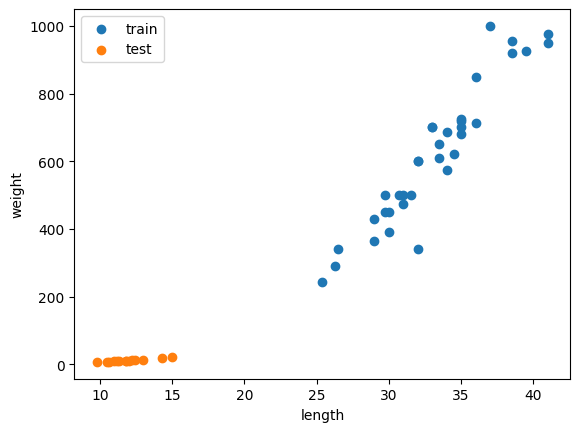

In [11]:
train_input = input_arr[:35]
train_target = target_arr[:35]

test_input = input_arr[35:]
test_target = target_arr[35:]

plt.scatter(train_input[:, 0], train_input[:, 1], label='train')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# sampling bias 발생

#### spilit dataset (try #2: random shuffle)

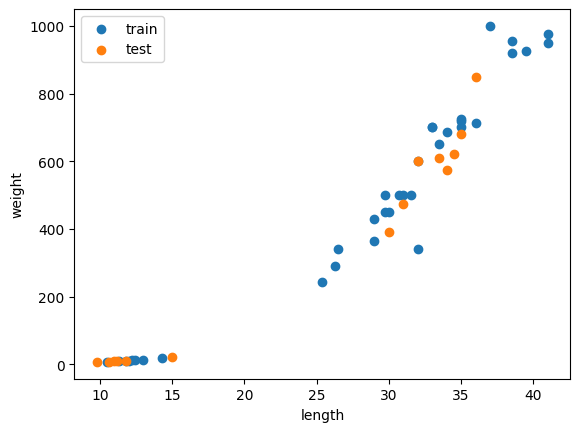

In [26]:
np.random.seed(42)
index = np.arange(len(input_arr))
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1], label='train')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

# shuffling은 수행 되었지만, 수행할 때마다 index가 계속 바뀌는 것이 또 좋지는 않음
# np.random.seed(42) 이 코드를 추가(seed의 숫자는 상관 없음)

#### spilit dataset (try #3: using sklearn)

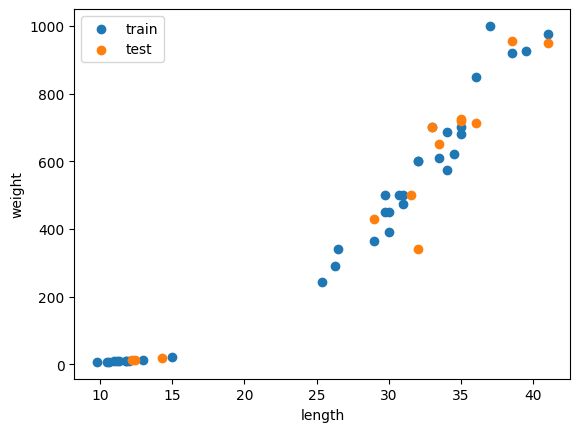

In [28]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  fish_data, fish_target, random_state=42
)

train_input = np.array(train_input)
test_input = np.array(test_input)
plt.scatter(train_input[:, 0], train_input[:, 1], label='train')
plt.scatter(test_input[:, 0], test_input[:, 1], label='test')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

#### spilit dataset (try #4: standardization)

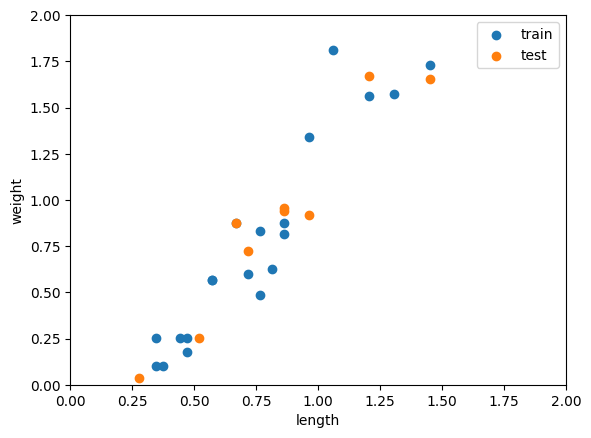

In [30]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

train_input_scaled = (train_input - mean) / std
test_input_scaled = (test_input - mean) / std

plt.scatter(train_input_scaled[:, 0], train_input_scaled[:, 1], label='train')
plt.scatter(test_input_scaled[:, 0], test_input_scaled[:, 1], label='test')
plt.xlim((0,2))
plt.ylim((0,2))
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()